In [67]:
import pandas as pd 


In [79]:
#bring in the data and show the first few coloums to make sure that nothing is broken
df = pd.read_csv('vgsales.csv')
df.shape

(16598, 11)

In [121]:
#function to check if a game is a microsoft owned game
def ismicrosoft(PublisherName):
    microsoftaliases =['Xbox Game Studios','Microsoft Game Studios','Microsoft Studios','Microsoft']
    Pubname = PublisherName.replace(' ','').upper()
    aliases = [x.replace(' ','').upper() for x in microsoftaliases]
    for name in aliases:
        if name == Pubname:
            return True
    return False
   
ismicrosoft('Xbox Game Studios')    

True

In [80]:
#get an idea for which entries we may need to get rid of
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [83]:
#since Publiisher information will be important when we query this data we are just gonna drop those entries
df = df.dropna()
print(df.shape,df.isnull().sum())


(16291, 11) Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [98]:
#in the data I noticed that microsoft has a few different aliases that they published titles for






In [122]:
df['Microsoft'] = df['Publisher'].map(lambda x: 'Microsoft' if ismicrosoft(x) else 'useless')

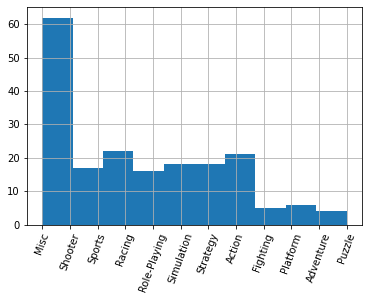

In [133]:
MSIP = df[df['Microsoft'] != 'useless']
MSIP['Genre'].hist(xrot = 70)

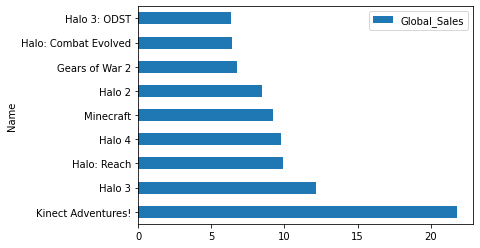

In [140]:
MSIP[0:9].plot.barh('Name','Global_Sales')

"NintendoNintendoNintendoNintendoNintendoNintendoNintendoNintendoNintendoNintendoNintendoNintendoNintendoNintendoNintendoMicrosoft Game StudiosTake-Two InteractiveTake-Two InteractiveNintendoNintendoNintendoNintendoNintendoTake-Two InteractiveTake-Two InteractiveNintendoNintendoNintendoSony Computer EntertainmentActivisionNintendoActivisionNintendoActivisionActivisionActivisionActivisionActivisionTake-Two InteractiveNintendoActivisionNintendoNintendoMicrosoft Game StudiosTake-Two InteractiveNintendoNintendoSony Computer EntertainmentNintendoNintendoNintendoTake-Two InteractiveSony Computer EntertainmentNintendoSony Computer EntertainmentActivisionTake-Two InteractiveNintendoNintendoNintendoUbisoftActivisionMicrosoft Game StudiosNintendoNintendoMicrosoft Game StudiosSony Computer EntertainmentActivisionUbisoftSony Computer EntertainmentActivisionNintendoMicrosoft Game StudiosNintendoNintendoBethesda SoftworksNintendoElectronic ArtsNintendoMicrosoft Game StudiosNintendoNintendoElectronic